In [ ]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import TimeDistributed, Dense, LSTM, Embedding, Dropout, Bidirectional, GlobalMaxPool1D
from tensorflow.python.keras.models import Model, Sequential
# -------- other packages ------------------ #
import sys
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets.csv to datasets.csv


In [ ]:
# import io
df = pd.read_csv('datasets.csv', index_col=0)
df = df.drop(df[df['transcription'].isna()].index)
df = df.drop(df[df['keywords'].isna()].index)

In [ ]:
df.astype(str)
df.head()

,transcription,keywords,keyword_count
0,23 year old white female presents complaint al...,allergy immunology allergic rhinitis allergies...,14
1,difficulty climbing stairs difficulty airline ...,bariatrics laparoscopic gastric bypass weight ...,28
2,seen abc today pleasant gentleman 42 years old...,bariatrics laparoscopic gastric bypass heart a...,27
3,1 left atrial enlargement left atrial diameter...,cardiovascular pulmonary mode doppler aortic v...,27
4,1 left ventricular cavity size wall thickness ...,cardiovascular pulmonary doppler echocardiogra...,33


In [ ]:
df["keywords"].str.split(" ")

0       [allergy, immunology, allergic, rhinitis, alle...
1       [bariatrics, laparoscopic, gastric, bypass, we...
2       [bariatrics, laparoscopic, gastric, bypass, he...
3       [cardiovascular, pulmonary, mode, doppler, aor...
4       [cardiovascular, pulmonary, doppler, echocardi...
                              ...                        
4984    [bariatrics, laparoscopic, gastric, bypass, ga...
4985    [bariatrics, jenny, craig, medifast, nutrisyst...
4989    [bariatrics, elective, surgical, weight, loss,...
4993    [allergy, immunology, chronic, glossitis, xero...
4995    [allergy, immunology, mucous, membranes, conju...
Name: keywords, Length: 3805, dtype: object

In [ ]:
def hasNumbers(inputString):
	return any(char.isdigit() for char in inputString)

def tag_keywords(all_keywords):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts([all_keywords])
	all_keywords = [i for i in tokenizer.word_index.keys()]
	all_keywords = list(set(all_keywords))
	return all_keywords


In [ ]:
def apply_max_threshold(cat):
  spl = cat.split(' ')

  res = []
  for i in spl:

    try:
      l = i.split(' ')
      if len(l) > 3:
        continue
    except:
      continue

    res.append(i)


  if len(res) > 45:
    return ','.join(res[:45])
  else:
    return ','.join(res)

In [ ]:
df['keywords'] = df['keywords'].apply(apply_max_threshold)

In [ ]:
df.head(5)

,transcription,keywords,keyword_count
0,23 year old white female presents complaint al...,"allergy,immunology,allergic,rhinitis,allergies...",14
1,difficulty climbing stairs difficulty airline ...,"bariatrics,laparoscopic,gastric,bypass,weight,...",28
2,seen abc today pleasant gentleman 42 years old...,"bariatrics,laparoscopic,gastric,bypass,heart,a...",27
3,1 left atrial enlargement left atrial diameter...,"cardiovascular,pulmonary,mode,doppler,aortic,v...",27
4,1 left ventricular cavity size wall thickness ...,"cardiovascular,pulmonary,doppler,echocardiogra...",33


In [ ]:
df['Sentence'] = df['transcription'].apply(lambda x: x.replace("–",""))
df['Keyword'] = df['keywords'].apply(lambda x: tag_keywords(x))

In [ ]:
df['Keyword']

0       [erythematous, sprays, allergies, nasal, aller...
1       [laparoscopic, programs, body, overweight, die...
2       [laparoscopic, study, body, embolism, pulmonar...
3       [valve, atrial, tricuspid, normal, effusion, r...
4       [calcification, wall, atrium, valve, root, atr...
                              ...                        
4984    [laparoscopic, obesity, liquid, gastric, morbi...
4985    [roux, fast, bypass, index, slim, bariatrics, ...
4989    [diabetes, overweight, surgical, gained, lap, ...
4993    [food, allergies, rast, allergy, testing, immu...
4995    [fever, ad, mucous, lib, kawasaki, allergy, co...
Name: Keyword, Length: 3805, dtype: object

In [ ]:
from pydantic import BaseModel

class Catat(BaseModel):
    catatan: str 
    class Config:
        schema_extra = {
            "example": {
                "catatan": "Consult for laparoscopic gastric", 
            }
        }


In [ ]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/keyword')
def get_keyword(data: Catat):
    received = data.dict()
    catatans = received['catatan']
    pred_keyword = tag_keywords(catatans)
    return {'keywords': pred_keyword}


In [ ]:
from colabcode import ColabCode
server = ColabCode(port=8000, code=False)

In [ ]:
server.run_app(app=app)

In [ ]:
sentence_column = []
keyword_column = []
for index, row in df.iterrows():
	new_keywords = []
	sentence = row['Sentence']
	keywords = row['Keyword']
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts([sentence])
	tokens = [i for i in tokenizer.word_index.keys()]
	for i in tokens:
		if i in keywords:
			if not hasNumbers(i):
				new_keywords.append(1)
		else:
			new_keywords.append(0)
	if sum(new_keywords) != 0:
		sentence_column.append(sentence)
		keyword_column.append(new_keywords)

In [ ]:
keyword_column[0]

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
tokenizer = Tokenizer(oov_token = "<UNK>")
tokenizer.fit_on_texts(sentence_column)
X = tokenizer.texts_to_sequences(sentence_column)
X = pad_sequences(X, padding = "post", truncating = "post", maxlen = 25, value = 0)
y = pad_sequences(keyword_column, padding = "post", truncating = "post", maxlen = 25, value = 0)
# y = [tf.keras.utils.to_categorical(i, num_classes = 2) for i in y]

In [ ]:
word_index = tokenizer.word_index

In [ ]:
DIM = 45
EPOCHS = 11

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
model = Sequential()
model.add(Embedding(len(word_index) + 1, DIM))
model.add(Bidirectional(LSTM(32, return_sequences = True, recurrent_dropout = 0.1)))
model.add(TimeDistributed(Dense(2, activation = "softmax")))
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, np.array(y_train), batch_size = 32, epochs = EPOCHS, validation_split = 0.1)

Epoch 1/11


ValueError: ignored

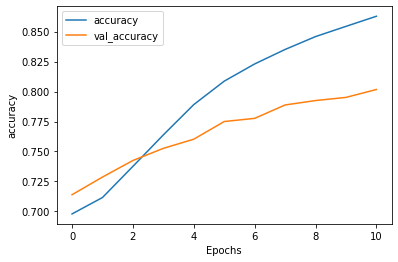

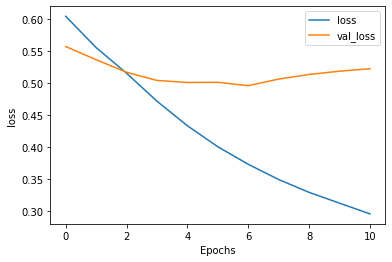

In [ ]:
from matplotlib import pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
test_output = model.predict(X_test)
test_output = np.argmax(test_output, axis = -1)


flattened_actual = (np.argmax(np.array(y_test), axis = -1)).flatten()
flattened_output = test_output.flatten()
print(classification_report(flattened_actual, flattened_output))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     13232
           1       0.69      0.60      0.64      5718

    accuracy                           0.80     18950
   macro avg       0.76      0.74      0.75     18950
weighted avg       0.79      0.80      0.79     18950



In [ ]:
test_output = model.predict(X_test)
test_output = np.argmax(test_output, axis = -1)
test_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(test_output[0])
print(y_test[0].flatten())

[0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0.]
